In [1]:
using Gadfly

In [15]:
function immitate(moved, nodes, prob)
    tot = 0
    for i in 1:(nodes - moved)
        for j in 1:moved
            if prob > rand() 
                tot = tot + 1 
                break
            end 
        end
    end
    tot
end

immitate (generic function with 1 method)

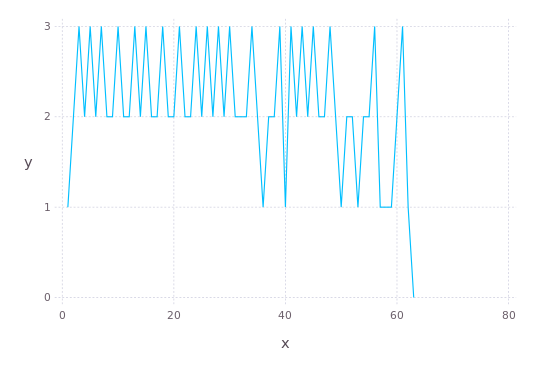

In [50]:
function catalyze(nodes = 5, prob = .5, moved = 1)
    record = [1]
    while moved > 0
        moved = immitate(moved, nodes, prob)
        #print(moved, "|")
        push!(record, moved)
    end
    record
end
record = catalyze()
plot(x = [x for x = 1:length(record)], y = record, Geom.line)

In [60]:
folds = 10
totalnodes = 10
allmoves = Float64[]
alltime = Float64[]
for i in 2:totalnodes
    avgmoves = 0
    avgtime = 0
    for j in 1:folds
        record = catalyze(i)
        avgmoves = avgmoves + (sum(record) / length(record))
        avgtime = avgtime + length(record)
    end
    push!(allmoves, avgmoves / folds)
    push!(alltime, avgtime / folds)
end

In [63]:
using DataFrames

In [65]:
data = DataFrame(nodes = [x for x = 2:totalnodes], moves = allmoves, time = alltime)

,nodes,moves,time
1,2,0.6683333333333333,3.3
2,3,0.9526190476190475,6.6
3,4,1.1461904761904762,6.6
4,5,1.693085472565675,34.3
5,6,2.537671891988952,250.9
6,7,3.2217614476331264,1788.5
7,8,3.4725377599315457,15186.8
8,9,4.356540842565371,250758.9
9,10,4.892244620096607,1.37786222e7


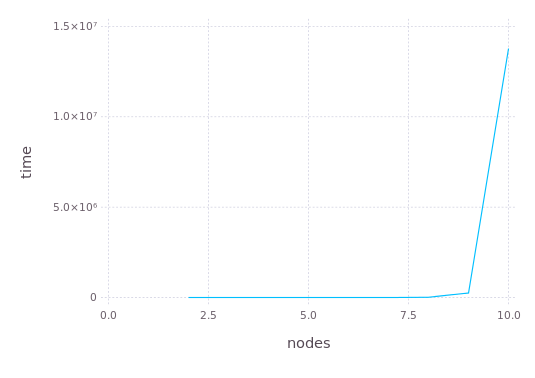

In [68]:
plot(data, x = "nodes", y = "time", Geom.line)

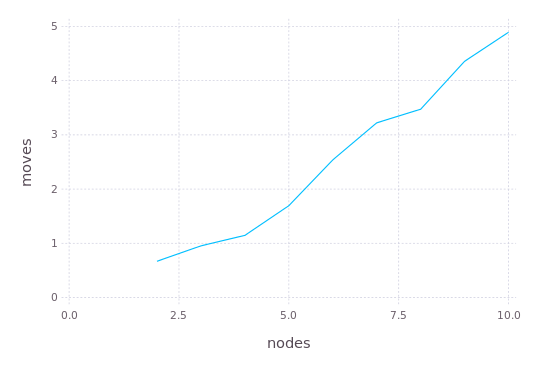

In [69]:
plot(data, x = "nodes", y = "moves", Geom.line)